In [1]:
import psycopg2
import matplotlib.pyplot as plt


connection = psycopg2.connect(
    database="piscineds",
    user="pbureera",
    password="mysecretpassword",
    host="localhost",
    port="5432",
)
connection.autocommit = True
cursor = connection.cursor()

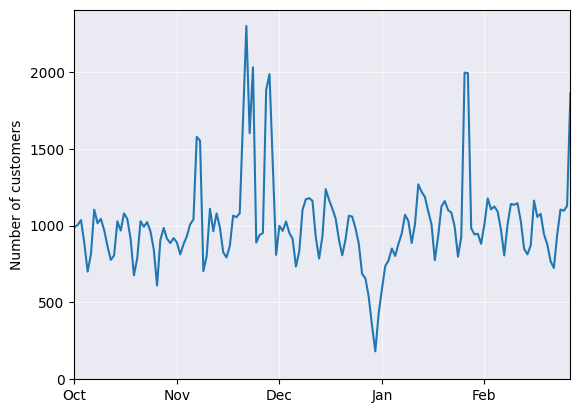

In [16]:
cursor.execute(
    """
    SELECT DATE_TRUNC('day', event_time) as day, COUNT(DISTINCT user_id)
    FROM customers
    WHERE event_type = 'purchase'
    GROUP BY day;
    """
)
data = cursor.fetchall()
date, customer_nb = zip(*data)
plt.plot(date, customer_nb)
plt.xticks(date[::31], labels=["Oct", "Nov", "Dec", "Jan", "Feb"])
plt.ylabel("Number of customers")

plt.gca().set_xlim(left=date[0], right=date[-1])
plt.gca().set_ylim(bottom=0) 
# set background color and grid style
plt.grid(visible=True, which='both', color='white', linestyle='-', linewidth=0.7)
# set background color to light grey
plt.gca().set_facecolor('#EAEAF2')
# set grid lines
plt.grid(True, color='w', linestyle='-', linewidth=0.5)
plt.show()


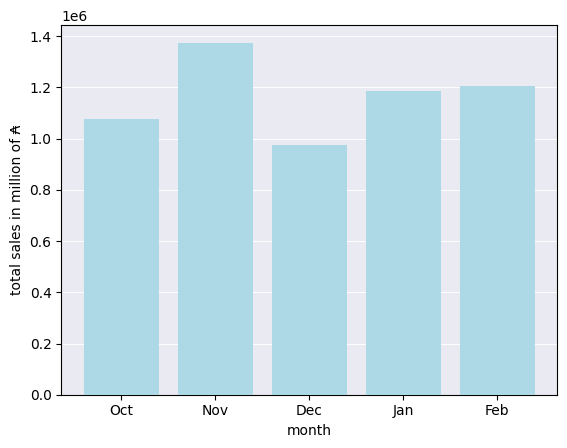

In [17]:
cursor.execute(
    """
    SELECT DATE_TRUNC('month', event_time) AS month, SUM(price)
    FROM customers
    WHERE event_type = 'purchase'
    GROUP BY month;
    """
)
data = cursor.fetchall()
month, sales = zip(*data)
plt.bar(["Oct", "Nov", "Dec", "Jan", "Feb"], sales, color='lightblue', edgecolor='none', alpha=1, zorder=3)
plt.xlabel("month")
plt.ylabel("total sales in million of ₳")

plt.gca().set_facecolor('#EAEAF2')
plt.grid(axis='y', color='white', linestyle='-', linewidth=0.7, zorder=0)
plt.show()


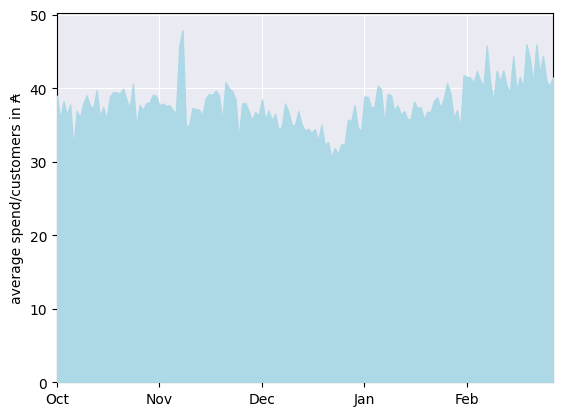

In [18]:
cursor.execute(
    """
    SELECT DATE_TRUNC('day', event_time) AS day, SUM(price)/COUNT(DISTINCT user_id) AS avg
    FROM customers
    WHERE event_type = 'purchase'
    GROUP BY day;
    """
)
data = cursor.fetchall()
date, avg = zip(*data)
plt.fill_between(date, 0, avg, color='lightblue', alpha=1, zorder=3)
plt.xticks(date[::31], labels=["Oct", "Nov", "Dec", "Jan", "Feb"])
plt.ylabel("average spend/customers in ₳")

plt.gca().set_xlim(left=date[0], right=date[-1])
plt.gca().set_ylim(bottom=0) 
plt.gca().set_facecolor('#EAEAF2')
plt.grid(visible=True, which='both', color='white', linestyle='-', linewidth=0.7, zorder=0)
plt.show()
